In [15]:
#import libraries
import pandas as pd
from datetime import datetime

In [16]:
df = pd.read_csv('Data_collection/Data/sunspot.csv', skiprows=None, header=None)

In [17]:
df.columns = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n']

In [18]:
Date = []
for i,j,k in zip(df['a'],df['b'],df['c']):
    date = datetime(i,j,k)
    gregorian_date = date.strftime('%Y-%m-%d %H:%M:%S')
    Date.append(gregorian_date)

In [21]:
df['Date']=Date

In [22]:
##Convert the date column to a datetime data type
df['date'] = pd.to_datetime(df['Date'])

In [23]:
df.index = df['date']

In [27]:
SN = df.loc[:,'e':'g']

In [29]:
SN.columns = ['tot','north', 'south']

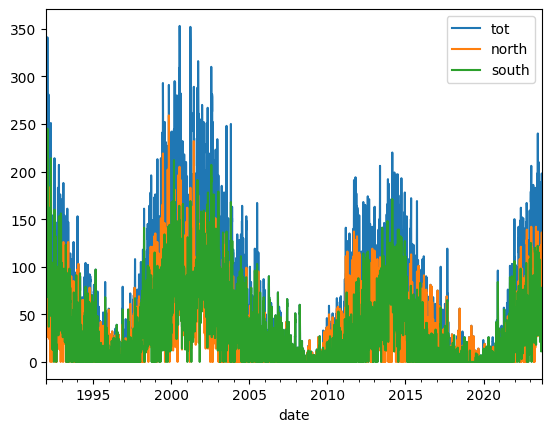

In [32]:
SN.plot();